In [1]:
from mmdet.apis import init_detector, inference_detector
device = 'cpu'

In [2]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_1x_coco/mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth

--2023-05-31 04:36:07--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_1x_coco/mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.23.213, 163.181.23.214, 163.181.23.212, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.23.213|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [3]:
from mmdet.apis import inference_detector, init_detector
config = '/mmdetection/configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_1x_coco.py'
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth'
model = init_detector(config, checkpoint, device=device)

Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth


In [4]:
result = inference_detector(model, '/mmdetection/demo/demo.jpg')


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
from mmdet.registry import VISUALIZERS
import mmcv
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

05/31 04:36:15 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


/opt/conda/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:759: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  ' the drawn bbox may not be in the image', UserWarning)
/opt/conda/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:830: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  ' the drawn polygon may not be in the image', UserWarning)


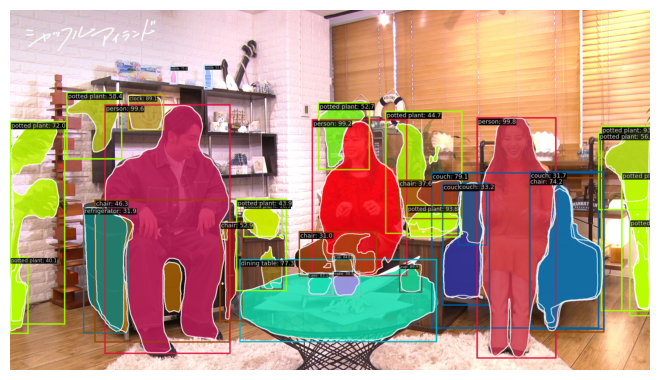

In [149]:
img = mmcv.imread('data/test.jpg', channel_order='rgb')
result = inference_detector(model, img)

# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()

In [72]:
model.dataset_meta['classes'][13]

'bench'

In [28]:
import numpy as np
bboxes = result.pred_instances.bboxes

In [152]:
model.dataset_meta['classes']

('person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush')

In [156]:
target_indexes = [i for i, x in enumerate(result.pred_instances.labels) if model.dataset_meta['classes'][x] == 'person']

[0, 1, 2, 79]

In [115]:
tmp_bboxes = result.pred_instances.bboxes
bench_bboxes = [tmp_bboxes[2], tmp_bboxes[14], tmp_bboxes[25]]

In [116]:
bench_bboxes

[tensor([217.6206, 181.7702, 455.2518, 387.8580]),
 tensor([374.0405, 135.6712, 430.8205, 190.1319]),
 tensor([ 56.5901, 108.7359, 146.3799, 135.2160])]

In [119]:
tmp_labels = result.pred_instances.labels
print(tmp_labels)
bench_labels = (tmp_labels[2], tmp_labels[14], tmp_labels[25])

tensor([ 2,  2, 13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 56, 13,  2,  0,  2,
         2,  2,  0,  2,  0,  2,  2, 13,  7, 56,  2,  2,  2,  2,  2,  2,  8,  2,
         0,  8,  7,  7,  2,  2,  2,  7,  2,  0,  2,  8,  0,  0,  0,  7,  2,  2,
         7])


In [120]:
bench_labels

(tensor(13), tensor(13), tensor(13))

In [150]:
# img = mmcv.imread('/mmdetection/demo/demo.jpg', channel_order='rgb')
img = mmcv.imread('data/test.jpg', channel_order='rgb')

In [137]:
import matplotlib.pyplot as plt

In [138]:
palette = model.dataset_meta.get('palette', None)
labels = result.pred_instances.labels
bbox_palette = palette
colors = [bbox_palette[label] for label in labels]

In [151]:
bboxes = result.pred_instances.bboxes

In [154]:
for bi, b in enumerate(bboxes):
    if bi in (0, 1, 2, 79):
        x1 = b[0]
        y1 = b[1]
        x2 = b[2]
        y2 = b[3]
        print("end: ", bi)
        for i, x in enumerate(img):
            for j, y in enumerate(x):
                if j >= x1 and j <= x2 and i >= y1 and i <= y2:
                    img[i][j] = 0

end:  0
end:  1
end:  2
end:  79


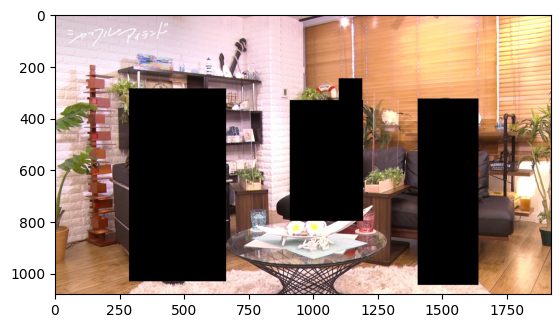

In [155]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(img)
plt.show()